In [54]:
# Ranger 7 mission
# Nathan Moore's work
import math
import numpy as np
import matplotlib.pyplot as plt

# constants
G=6.67e-11 
m_earth=5.98e24 # kg (Earth's mass)
m_ranger= 10000 # kg (mass of rocket)
m_moon=7.35e22 # kg (moon's mass)
r_earth=6.388e6 # m (radius of Earth)
r_moon_earth=3.844e8 # m (distance from Earth to moon)
r_moon=1740e3 #m
# determine the point of no return via gravitational force balance
a=1.0-(m_moon/m_earth)
b=-2.0*r_moon_earth
c=r_moon_earth**2
r_point_of_no_return = (-b-math.sqrt(b**2-4*a*c))/(2.0*a)

#simulation parameters and controls
t1=0
dt=6.0e1 # (s)
t_limit = 30*24*3600 # (s) 
r1 = r_earth + 50e3
v1 = 11.0e3 # m/s velocity at engine flameout

def print_state(t,r,v):
    print("t = %.2e (s)\tr = %.2e (m)\tv = %.2e (m/s)"%(t,r,v))

print("simulation starts:")
print_state(t1,r1,v1)    

# these are the lists of numbers I can't re-create when the simulation is done.  
# saved for plotting after sim is done
v_2s=[v1]
r_2s=[r1]
t_2s=[t1]

# I'm using the "Velocity-Verlet" integrator so I need a second initial state points
F1 = -G*m_earth*m_ranger/r1**2 + G*m_moon*m_ranger/(r_moon_earth-r1)**2
a1 = F1/m_ranger
v2 = v1 + a1*dt
r2 = r1 + v1*dt + 0.5*a1*dt*dt
t2 = t1 + dt

print_state(t2,r2,v2)

# repeat DiffEq solver procedure many many times to get an approximate model for the motion
stop_simulation = 0
passed_point_of_no_return=0
while (stop_simulation == 0) :
    
    # compute force (i=2), based on (i=2) position (but not velocity, because Verlet...)
    F2 = -G*m_earth*m_ranger/r2**2 + G*m_moon*m_ranger/(r_moon_earth-r2)**2
    a2 = F2/m_ranger
    
    # apprimately solve differential equation over a very short time interval
    # using the "Velocity Verlet" DEQ integrator
    # r3 = new position, i+1
    # r2 = current position, i
    # r1 = old position, i-1
    r3 = 2.0*r2 - r1 + a2*dt*dt
    v2 = (r3 - r1)/(2.0*dt)

    # store the current dynamic values
    v_2s.append(v2)
    r_2s.append(r2)
    t_2s.append(t2)
    
    # update/recycle values for the next loop
    r1 = r2
    r2 = r3
    t2 = t2 + dt

    # checks to see if the simulation should keep going:
    if( r2<r_earth ) :
        print_state(t2,r2,v2)
        print("rocket fell back to earth at t = %.2e (sec) = %.1f (hours)"%(t2,t2/3600))
        stop_simulation=1
                
    if( t2>t_limit) :
        print_state(t2,r2,v2)
        print("simulation ran out of time at t = %.2e (sec) = %.1f (hours)"%(t2,t2/3600))
        stop_simulation=1
    
    if (passed_point_of_no_return==0 and r2>r_point_of_no_return ) :
        passed_point_of_no_return=1
        print_state(t2,r2,v2)
        print("passed point of no return at t = %.2e (sec) = %.1f (hours)"%(t2,t2/3600))

    if( r2>(r_moon_earth-r_moon) ):
        print_state(t2,r2,v2)
        print("Ranger probe arrived at moon at  t = %.2e (sec) = %.1f (hours)"%(t2,t2/3600))
        stop_simulation=1

############## simulation loop is over ##################

simulation starts:
t = 0.00e+00 (s)	r = 6.44e+06 (m)	v = 1.10e+04 (m/s)
t = 6.00e+01 (s)	r = 7.08e+06 (m)	v = 1.04e+04 (m/s)
t = 4.65e+05 (s)	r = 5.71e+06 (m)	v = -1.10e+04 (m/s)
rocket fell back to earth at t = 4.65e+05 (sec) = 129.2 (hours)


In [46]:
# convert simulation data to numpy arrays
t=np.array(t_2s)
r=np.array(r_2s)
v=np.array(v_2s)
# and then create Force, KE, PE arrays
F = -G*m_earth*m_ranger/r**2 + G*m_moon*m_ranger/(r_moon_earth-r)**2
KE = 0.5*m_ranger*v**2
PE = -G*m_earth*m_ranger/r + -G*m_moon*m_ranger/(r_moon_earth-r)

Text(0, 0.5, 'speed, v (m/s)')

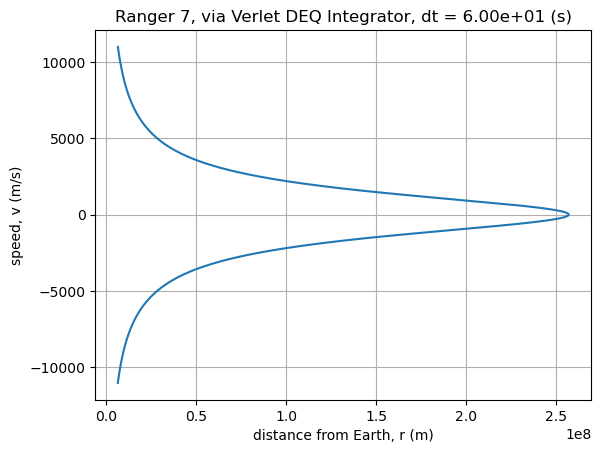

In [52]:
plt.plot(r,v)
plt.title("Ranger 7, via Verlet DEQ Integrator, dt = %.2e (s)"%dt)
plt.grid()
plt.xlabel("distance from Earth, r (m)")
plt.ylabel("speed, v (m/s)")
#plt.savefig("verlet_ranger-r-v-plot.pdf")
#plt.savefig("verlet_ranger-r-v-plot.png")
#plt.close()